In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=5000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=5000)
lat_lngs = zip(lats, lngs)

# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [3]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

1427

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

Beginning Data Retrieval     
-----------------------------


In [6]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | cockburn town
Processing Record 2 of Set 1 | parkhill
Processing Record 3 of Set 1 | sergeyevka
Processing Record 4 of Set 1 | thompson
Processing Record 5 of Set 1 | pitimbu
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | dingle
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | ribeira grande
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | abu samrah
Processing Record 13 of Set 1 | kruisfontein
Processing Record 14 of Set 1 | bryan
Processing Record 15 of Set 1 | lagoa
Processing Record 16 of Set 1 | haines junction
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | qaanaaq
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | aitape
Processing Record 21 of Set 1 | hilo
Processing Record 22 of Set 1 | maniitsoq
Processing Record 23 of Set 1 | rikitea
Processing Record 24 of Set 1 | amderma
City not found.

City not found. Skipping...
Processing Record 37 of Set 4 | sabang
Processing Record 38 of Set 4 | waspan
Processing Record 39 of Set 4 | hithadhoo
Processing Record 40 of Set 4 | lorengau
Processing Record 41 of Set 4 | mahajanga
Processing Record 42 of Set 4 | sardarshahr
Processing Record 43 of Set 4 | bodaybo
Processing Record 44 of Set 4 | udachnyy
Processing Record 45 of Set 4 | shaunavon
Processing Record 46 of Set 4 | urusha
Processing Record 47 of Set 4 | pangody
Processing Record 48 of Set 4 | kahramanmaras
Processing Record 49 of Set 4 | constitucion
Processing Record 50 of Set 4 | broome
Processing Record 1 of Set 5 | baie-comeau
Processing Record 2 of Set 5 | tommot
Processing Record 3 of Set 5 | pacific grove
Processing Record 4 of Set 5 | kirkwall
Processing Record 5 of Set 5 | rio grande
Processing Record 6 of Set 5 | praia da vitoria
Processing Record 7 of Set 5 | hobyo
Processing Record 8 of Set 5 | abu dhabi
Processing Record 9 of Set 5 | kudahuvadhoo
Processing Reco

Processing Record 29 of Set 8 | matata
Processing Record 30 of Set 8 | amuntai
Processing Record 31 of Set 8 | yar-sale
Processing Record 32 of Set 8 | tazovskiy
Processing Record 33 of Set 8 | shillong
Processing Record 34 of Set 8 | safaga
Processing Record 35 of Set 8 | honningsvag
Processing Record 36 of Set 8 | shelburne
Processing Record 37 of Set 8 | gimli
Processing Record 38 of Set 8 | sukpak
Processing Record 39 of Set 8 | guarapari
Processing Record 40 of Set 8 | talnakh
Processing Record 41 of Set 8 | vangaindrano
Processing Record 42 of Set 8 | ifanadiana
Processing Record 43 of Set 8 | ketchikan
Processing Record 44 of Set 8 | haibowan
City not found. Skipping...
Processing Record 45 of Set 8 | hihifo
City not found. Skipping...
Processing Record 46 of Set 8 | kimbe
Processing Record 47 of Set 8 | amarante
Processing Record 48 of Set 8 | los llanos de aridane
Processing Record 49 of Set 8 | komsomolets
Processing Record 50 of Set 8 | arawa
Processing Record 1 of Set 9 | c

Processing Record 14 of Set 12 | pangnirtung
Processing Record 15 of Set 12 | vardo
Processing Record 16 of Set 12 | angoram
Processing Record 17 of Set 12 | tipuani
Processing Record 18 of Set 12 | minuri
Processing Record 19 of Set 12 | idah
Processing Record 20 of Set 12 | uttaradit
Processing Record 21 of Set 12 | kununurra
Processing Record 22 of Set 12 | brae
Processing Record 23 of Set 12 | umm lajj
Processing Record 24 of Set 12 | port maria
Processing Record 25 of Set 12 | imbituba
Processing Record 26 of Set 12 | gouyave
Processing Record 27 of Set 12 | dingli
Processing Record 28 of Set 12 | hoquiam
Processing Record 29 of Set 12 | kambove
Processing Record 30 of Set 12 | yarensk
Processing Record 31 of Set 12 | wajima
Processing Record 32 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 33 of Set 12 | bakchar
Processing Record 34 of Set 12 | zabol
Processing Record 35 of Set 12 | agustin codazzi
Processing Record 36 of Set 12 | jatara
Processing Record 3

Processing Record 3 of Set 16 | dali
Processing Record 4 of Set 16 | nanakuli
Processing Record 5 of Set 16 | coyah
Processing Record 6 of Set 16 | nuevo progreso
Processing Record 7 of Set 16 | awjilah
Processing Record 8 of Set 16 | anori
Processing Record 9 of Set 16 | sao paulo do potengi
Processing Record 10 of Set 16 | ukiah
Processing Record 11 of Set 16 | taybad
Processing Record 12 of Set 16 | sesheke
Processing Record 13 of Set 16 | camacha
Processing Record 14 of Set 16 | kasama
Processing Record 15 of Set 16 | sabancuy
Processing Record 16 of Set 16 | pital
Processing Record 17 of Set 16 | batticaloa
Processing Record 18 of Set 16 | sembe
Processing Record 19 of Set 16 | sainte-marie
Processing Record 20 of Set 16 | yanggu
Processing Record 21 of Set 16 | orlik
Processing Record 22 of Set 16 | iznoski
Processing Record 23 of Set 16 | ballina
Processing Record 24 of Set 16 | sumbawa
City not found. Skipping...
Processing Record 25 of Set 16 | launceston
Processing Record 26 

Processing Record 39 of Set 19 | tignere
Processing Record 40 of Set 19 | arak
Processing Record 41 of Set 19 | havre-saint-pierre
Processing Record 42 of Set 19 | jilikul
Processing Record 43 of Set 19 | copala
Processing Record 44 of Set 19 | ugoofaaru
Processing Record 45 of Set 19 | mbanza-ngungu
Processing Record 46 of Set 19 | chicama
Processing Record 47 of Set 19 | panama city
Processing Record 48 of Set 19 | chiredzi
Processing Record 49 of Set 19 | obo
Processing Record 50 of Set 19 | rolla
Processing Record 1 of Set 20 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 2 of Set 20 | tsiroanomandidy
Processing Record 3 of Set 20 | boke
Processing Record 4 of Set 20 | savinskiy
Processing Record 5 of Set 20 | llata
Processing Record 6 of Set 20 | estelle
Processing Record 7 of Set 20 | ternate
Processing Record 8 of Set 20 | karaton
Processing Record 9 of Set 20 | rio gallegos
Processing Record 10 of Set 20 | calvia
Processing Record 11 of Set 20 | deep river
P

City not found. Skipping...
Processing Record 28 of Set 23 | antsohihy
Processing Record 29 of Set 23 | sun city west
Processing Record 30 of Set 23 | ingham
Processing Record 31 of Set 23 | erdenet
Processing Record 32 of Set 23 | ustka
Processing Record 33 of Set 23 | mastic beach
Processing Record 34 of Set 23 | payakumbuh
Processing Record 35 of Set 23 | sidi qasim
City not found. Skipping...
Processing Record 36 of Set 23 | toftir
City not found. Skipping...
Processing Record 37 of Set 23 | suntar
Processing Record 38 of Set 23 | bhuj
Processing Record 39 of Set 23 | sassandra
Processing Record 40 of Set 23 | utiroa
City not found. Skipping...
Processing Record 41 of Set 23 | praya
Processing Record 42 of Set 23 | tigil
Processing Record 43 of Set 23 | mecca
Processing Record 44 of Set 23 | ocampo
Processing Record 45 of Set 23 | stornoway
Processing Record 46 of Set 23 | bolungarvik
City not found. Skipping...
Processing Record 47 of Set 23 | khorixas
Processing Record 48 of Set 

Processing Record 6 of Set 27 | hendijan
City not found. Skipping...
Processing Record 7 of Set 27 | paysandu
Processing Record 8 of Set 27 | asfi
Processing Record 9 of Set 27 | newport
Processing Record 10 of Set 27 | lisakovsk
Processing Record 11 of Set 27 | catio
Processing Record 12 of Set 27 | koungou
Processing Record 13 of Set 27 | dudinka
Processing Record 14 of Set 27 | araguaina
Processing Record 15 of Set 27 | pangkalanbuun
Processing Record 16 of Set 27 | hambantota
Processing Record 17 of Set 27 | mporokoso
Processing Record 18 of Set 27 | fergus falls
Processing Record 19 of Set 27 | limbang
Processing Record 20 of Set 27 | kinshasa
Processing Record 21 of Set 27 | santa vitoria do palmar
Processing Record 22 of Set 27 | papasquiaro
City not found. Skipping...
Processing Record 23 of Set 27 | salinopolis
Processing Record 24 of Set 27 | saurimo
Processing Record 25 of Set 27 | enshi
Processing Record 26 of Set 27 | ejea de los caballeros
Processing Record 27 of Set 27 |

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cockburn Town,TC,2020-06-21 19:50:02,21.46,-71.14,86.00,70,40,13.87
1,Parkhill,CA,2020-06-21 19:50:02,43.15,-81.68,87.01,78,43,1.99
2,Sergeyevka,KZ,2020-06-21 19:50:02,53.88,67.42,53.24,86,100,3.67
3,Thompson,CA,2020-06-21 19:50:03,55.74,-97.86,55.40,93,90,10.29
4,Pitimbu,BR,2020-06-21 19:50:03,-7.47,-34.81,77.00,83,40,13.87
5,Yellowknife,CA,2020-06-21 19:50:03,62.46,-114.35,77.00,43,20,23.04
6,Dingle,PH,2020-06-21 19:50:04,11.00,122.67,77.81,85,97,3.40
7,Mataura,NZ,2020-06-21 19:50:04,-46.19,168.86,31.98,95,0,1.63
8,Bredasdorp,ZA,2020-06-21 19:50:04,-34.53,20.04,55.40,100,81,3.04
9,Ribeira Grande,PT,2020-06-21 19:50:04,38.52,-28.70,68.00,88,40,11.41


In [8]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [9]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [10]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'06/21/20'

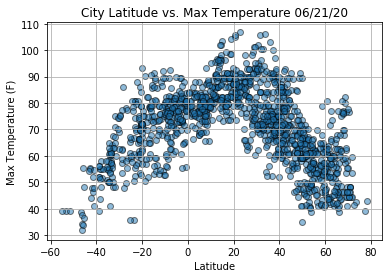

In [11]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.5, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

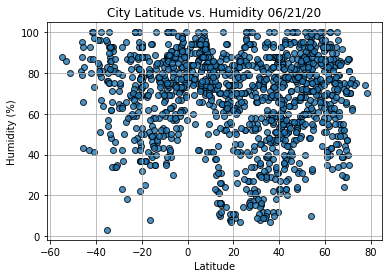

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

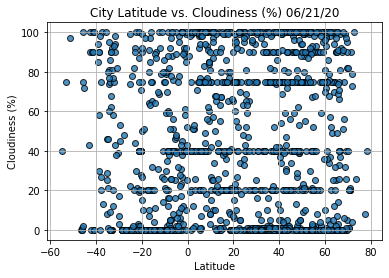

In [13]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

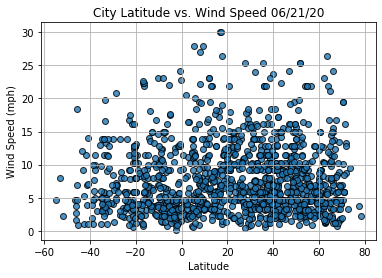

In [14]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [15]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Set Plot size
    plt.subplots(figsize = (10,6))
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

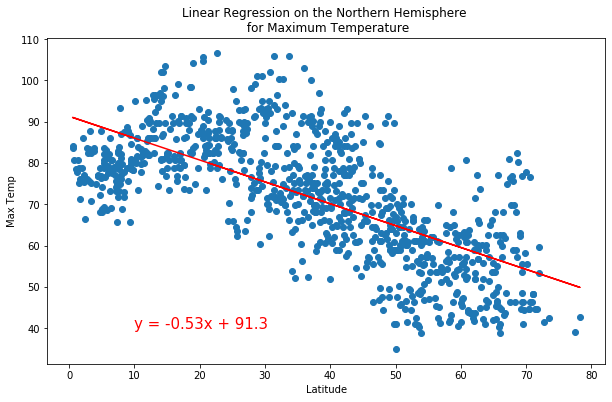

In [16]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

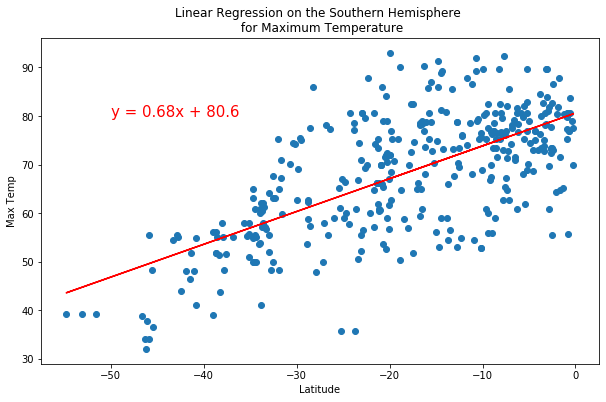

In [17]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,80))

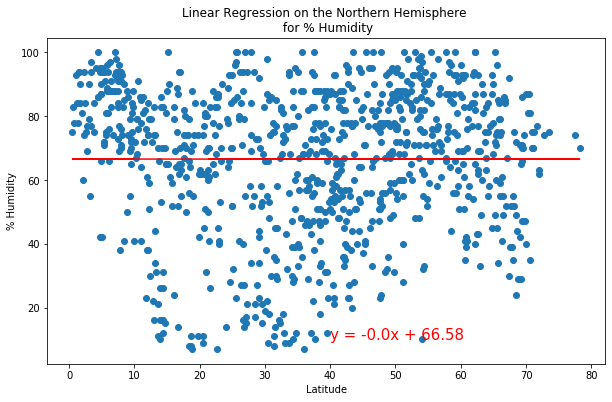

In [18]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

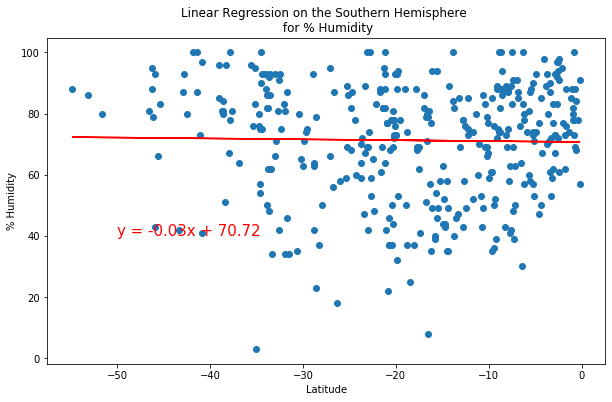

In [19]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,40))

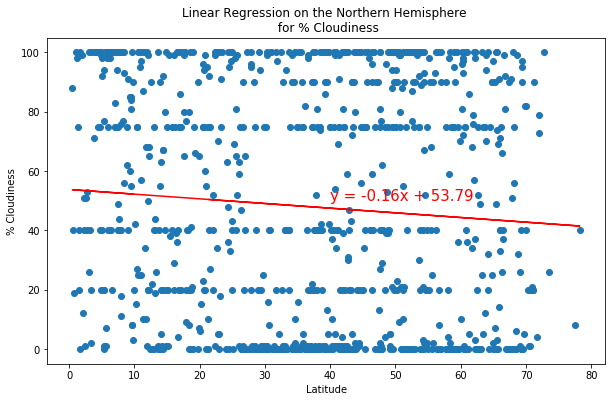

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,50))

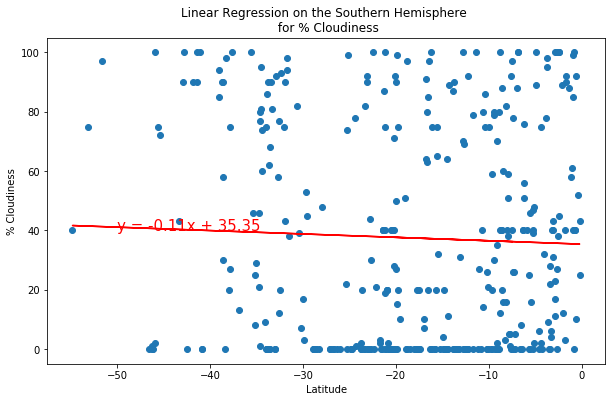

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,40))

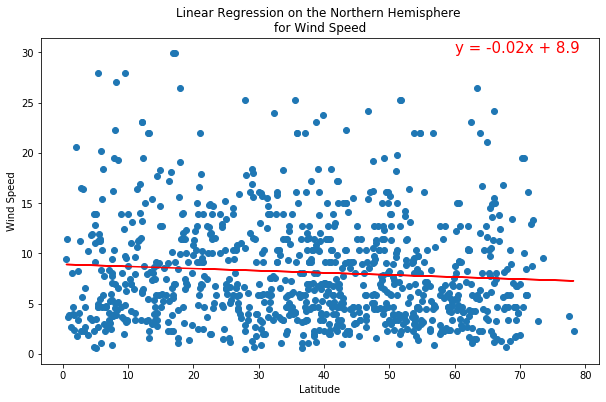

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(60,30))

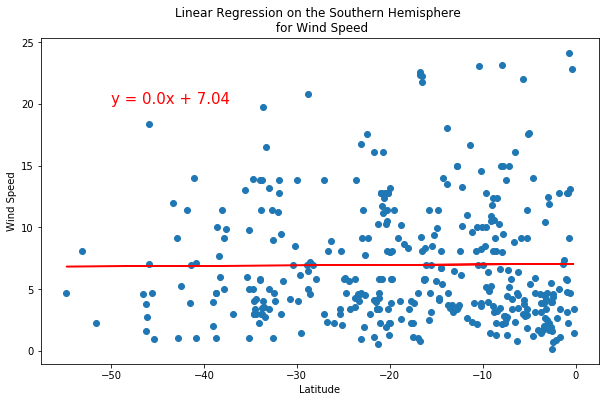

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,20))